In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from pybind_util import Util

util = Util()

initial [Util] for image processing


In [4]:
i = 0
lq = loadmat(f"test/test_{i}.mat")['data']
hq = loadmat(f"test/test_sr{i}.mat")['data']

In [5]:
lq = lq / lq.max()
hq = hq / hq.max()

(<Axes: title={'center': 'hq'}>,
 (-0.5, 1999.5, 1999.5, -0.5),
 Text(0.5, 1.0, 'hq'))

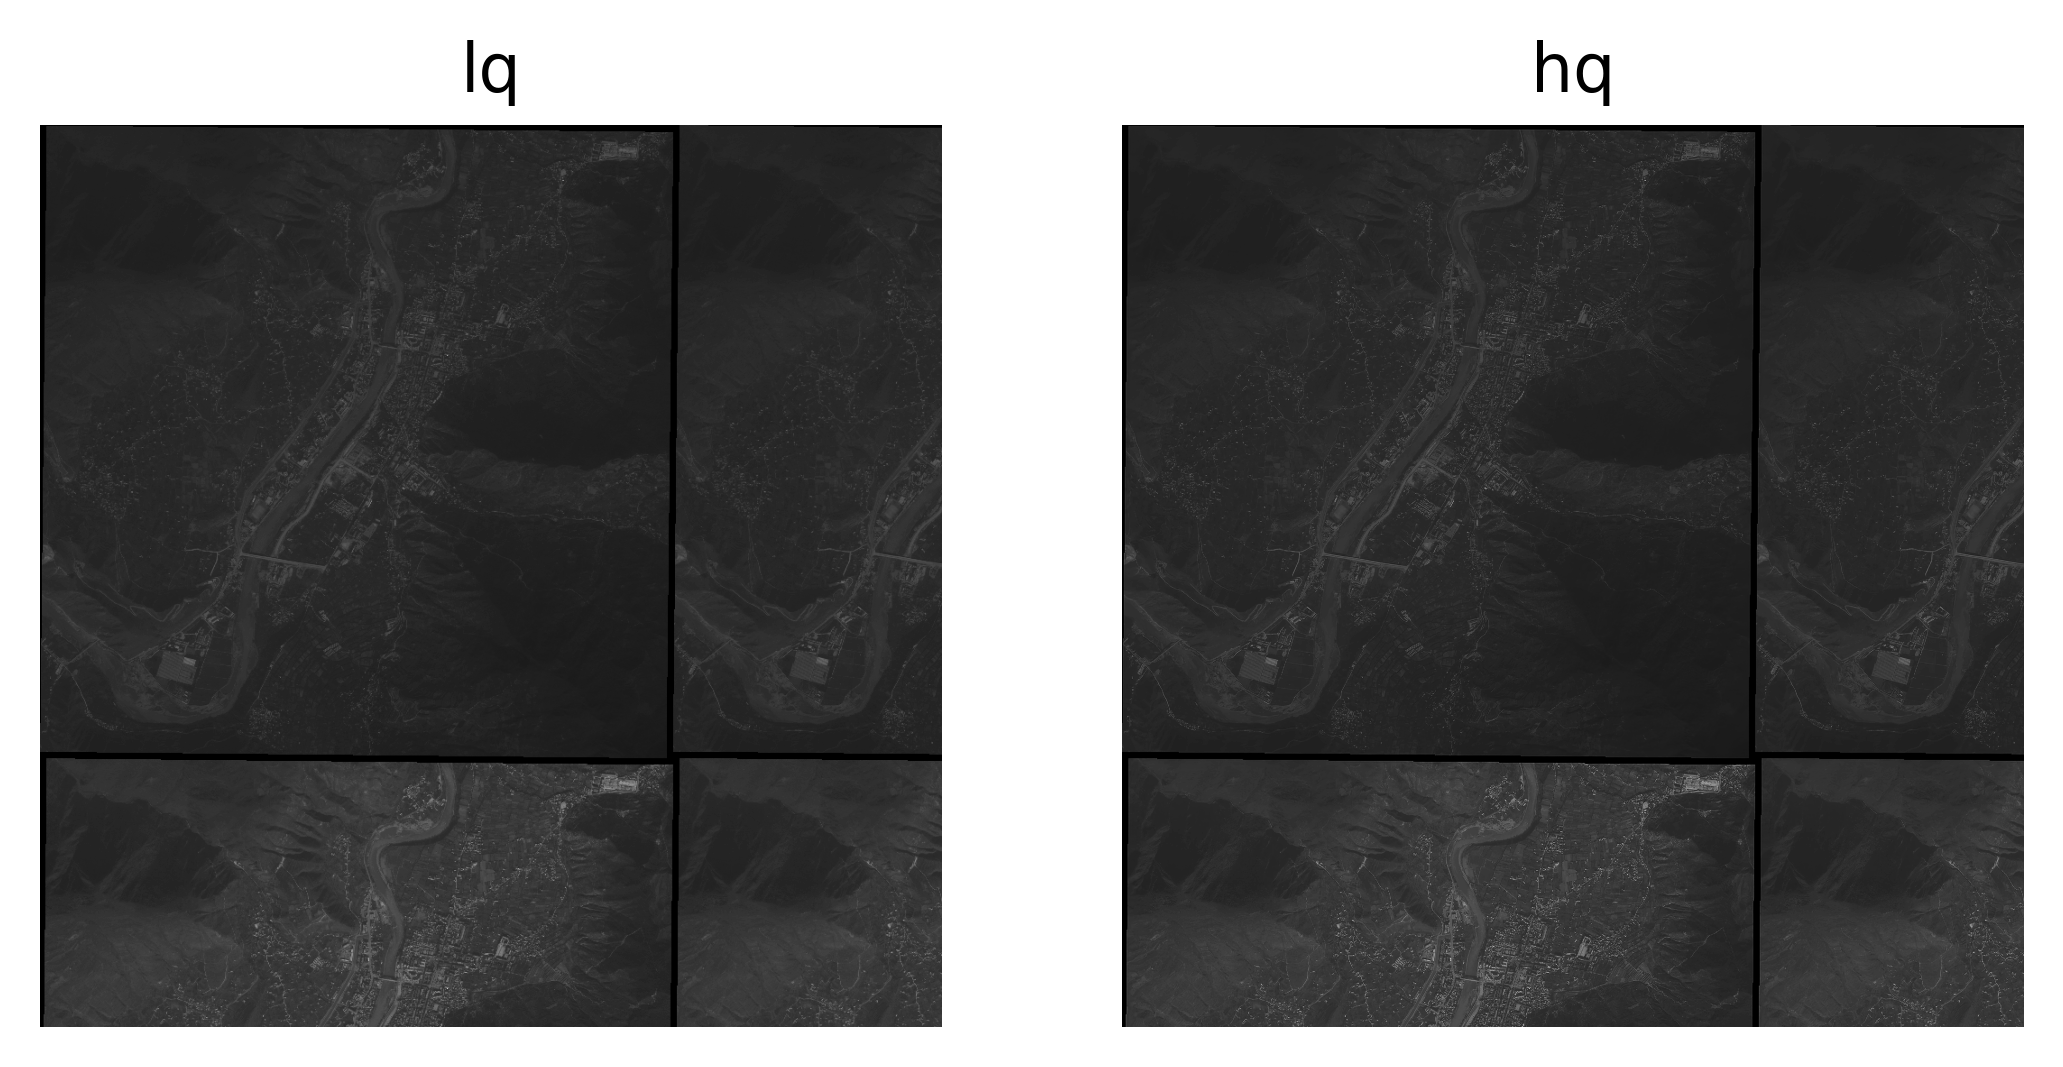

In [8]:
plt.figure(dpi=400)
plt.subplot(121), plt.imshow(lq, 'gray'), plt.axis('off'), plt.title('lq')
plt.subplot(122), plt.imshow(hq, 'gray'), plt.axis('off'), plt.title('hq')

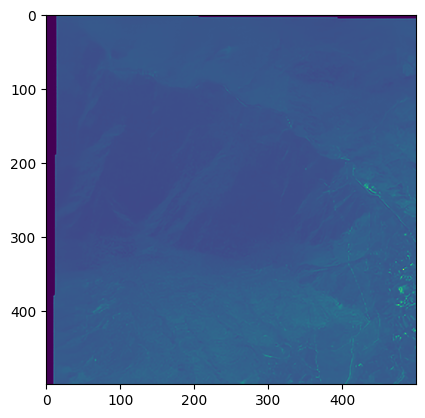

In [7]:
plt.imshow(hq[:500, :500])